# Basics

## Fourier

### Fourier-series of periodic signals
Page 234 Proakis
Periodic signals and it's fourier series:
$$ x(n)=\sum_{k=-\infty}^{\infty}c_ke^{j2\pi kF_0t}, \quad f=kF_0 $$
So with every k, the terms are spaced as a multiple of the fundamental frequency. The resulting power spectrum results in equally spaced lines where the distance is equal to the fundamental frequency.

### Fourier-series of aperiodic signals
The spacing of lines in the periodic case depends on the fundamental frequency, which in turn depends on the fundamental period. One could say that as the fundamental period approaches infinity, the spacing will near zero and the resulting spectrum will turn into the envelope of the periodic case.

### Rules for existance of Fourier transform
page 243 Proakis
1. Finite number of finite discontinuities
2. Finite number of maxima and minima
3. Absolutely integrable, that is:
$$ \int_{-\infty}^{\infty}x(t)e^{-j\Omega t}dt < \infty $$

## System response analysis

### Rational system functions
Page 198 Proakis
Essentially started with a rational expression of an LTI system, then expressed the output as a sum of a natural response and a response influenced by the state of the system ie the initial conditions.

### Steady state response

$$ X(z)=\frac{N(z)}{Q(z)}, \quad H(z)=\frac{B(z)}{A(z)} $$
$$ Y(z)=H(z)X(z)=\frac{B(z)N(z)}{A(z)Q(z)} $$
$$ \xrightarrow{z^{-1}} \sum_{k=1}^{N}A_k(p_k)^nu(n)+\sum_{k=1}^{L}Q_k(q_k)^nu(n) $$

From page 198 Proakis, it was deduced that an LTI system could be expressed as a sum of its natural response and forced response. The natural response is dependent on the system, forced depending on the input sequence. The forced term is dependent on the poles of the input, and therefore affects the final output. If the poles of the forced input lies within the unit circle, there is decay present. If a sinusoid signal is used, the poles are on the unit circle, and no decay is present.

This is the steady-state response of the system.

### Response of Pole-zero systems with nonzero initial conditions
Can be analyzed using one-sided Z-transform. Refer to page 215 Proakis, the results show that the response is composed of the natural response and the forced response. The effects however, showed that the input sequence affected the natural response, thus changing the behavior of the system.

### Steady-state and transient response analysis by differential expressions
Expanding a system to its zero-state and transient response terms gives an intuition into how the system behaves.
Take for example:
$$ y(n)=ay(n-1)+x(n) $$
Homogenous solution always give the zero state response:
$$ x(n)=0 \rightarrow y(n)=ay(n-1)=a^ny(0) $$
$$ any \quad starting \quad point \rightarrow y(n)=a^{n+1}y(-1) $$
Particular solution gives the cumulative effect during the zero-state:
$$ y(0)=ay(-1)+x(0) $$
$$ y(1)=ay(0)+x(1) $$
$$ y(2)=ay(1)+x(2) $$
$$ \rightarrow \sum_{k=0}^{n}a^kx(n-k) $$
So the total expression is:
$$ y(n)=a^{n+1}y(-1)+\sum_{k=0}^{n}a^kx(n-k) $$
So from this response, it is easier to see that the output is built from past output of one step, and a cumulative effect of the second term.

### Periodic vs aperiodic input
If the input is periodic, then it is defined for all values. The total response of a system at any time n is therefore equal to the steady-state response. The output is also periodic.



## IIR

### Recursive description
The output of a system described with its impulse response:
$$
y(n)=\sum_{k=0}^{M-1}h(k)x(n-k)
$$
Works well with FIR systems. However in IIR systems:
$$
y(n)=\sum_{k=0}^{\infty}h(k)x(n-k)
$$
The requirement in convolution requires infinite samples, because the total response of the infinite series is an infinite response. This is computationally unrealistic in practical sense, therefore a recursive method interpretation can be performed.

On page 92 Proakis, consider the system described, y(n) is a sum of it's past output and the current input. The system becomes recursive by extracting the past value from left hand and sum of its past inputs with the recent.

The IIR system is now described as a finite system with computer memory as its only limitation.

#### Relaxed vs nonrelaxed
Describes if the recursive system starts at 0 or not, determined by what y(-1) is equal to, zero or not.

The nature of y(-1) tracks the state of the system. If it is zero, the system response is a free natural response, showcasing the behaviour of the system.

## Quantisize

### Aliasing
For example: 
$$
x(t)=3cos100 \pi t
\rightarrow 
3cos2 \pi 50t
$$

If sampled at Fs=100:

$$
x(n)=3cos2 \pi \frac{50}{100}n
\rightarrow
3cos \pi n
$$

If sampled at Fs=75:

$$
x(n)=3cos2 \pi \frac{50}{75}n
\rightarrow
3cos \pi \frac{1}{3}n
$$

The two signals are clearly different.

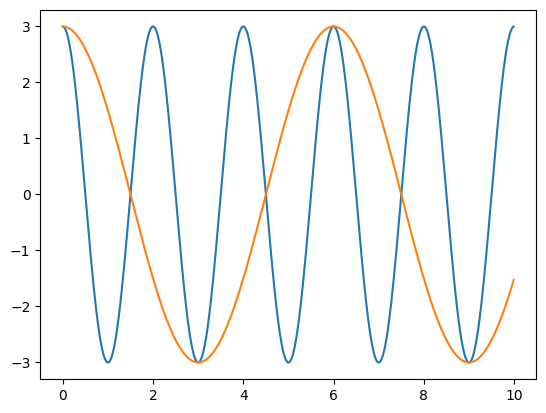

In [3]:
import numpy as np
import matplotlib.pyplot as plt

T = 10
Fs = 100

t = np.linspace(0, T, int(Fs*T),endpoint=False)

x = 3*np.cos(np.pi*t)
plt.plot(t,x)

Fs = 75

x = 3*np.cos(np.pi*1/3*t)
plt.plot(t,x)

### Number of bits
Formula:
$$
\Delta = \frac{x_{max}-x_{min}}{L-1}
$$
Where delta is the resolution

Example: Propose that a resolution of 0.1 is desired, and the signal is:
$$
x(n)=10cos(\frac{\pi}{5}n)
$$
$$
x_{max}-x_{min}=10-(-10)=20
$$
$$
\rightarrow L=\frac{x_{max}-x_{min}}{\Delta}+1=201
$$
$$
2^7=128, \quad 2^8=256
$$
The desired amount of bits is therefore 8

## Z-transform

The Z transform exists only if the sum of components in which the transform is defined converges to a value, ie ROC exists.

### Correlation of two sequences
$$ x_1(n) \xrightarrow{z} X_1(z), \quad x_2(n) \xrightarrow{z} X_2(n) $$
$$ r_{x_1 x_2} = \sum_{n=-\infty}^{\infty} x_1(n)x_2(n-l) \xrightarrow{z} R_{x_1 x_2}(z)=X_1(z)X_2(z^{-1}) $$

### Multiplication of sequences
Page 170 Proakis
If the two sequences are complex valued in the discrete time domain, Parseval's relation is used page 172 Proakis

### One sided Z-transform
The two-sided z-transform (What you are used to):
$$ X(z)=\sum_{n=-\infty}^{\infty}x(n)z^{-n} $$
And the one-sided z-transform:
$$ X^+(z)=\sum_{n=0}^{\infty}x(n)z^{-n} $$
The one-sided transform contains no information of past samples, and it is unique only for causal signals. Causal signals have unique transforms, but noncausal signals have non-unique transforms. Anticausal transforms are always zero.

Refer to page 210 Proakis for property rules

## Basic Modelling

### Basic filter design
1. All poles must be placed within the unit circle, zeroes can be placed anywhere
2. All complex zeros and poles must exist in conjugate pairs in order for coefficients to be real

### Find impulse response of an unknown system
Proof page 330 Proakis
Summary: The impulse response can be determined by exciting the input with a spectraly flat signal, and cross correlating it with the output of the system.


## Smaller notes

### Discrete-time signals are uniquely determined
For example the causal signal and non-causal signal: $$ a^nu(n), \quad -a^nu(-n-1) $$ both transform into: $$ \frac{1}{1-az^-1} $$

### ROC
Those values of z that the signal converges.

For example:
$$ x(n)=a^nu(n) \rightarrow^z \frac{1-(az^-1)^{\infty}}{1-(az^-1)} $$
$$ \rightarrow \frac{1}{1-az^-1}, \quad \pm \infty \quad if \quad |az^-1|>1 $$
$$ \rightarrow |z|<|a| $$

### Poles and zeros
If the poles are placed past 90 degrees, the output changes sign continously, resembling an oscillator

### General LTI system
Consider the general form of an LTI system:
$$ H(z)=\frac{\sum_{k=0}^{M}b_kz^{-k}}{1+\sum_{k=1}^{N}a_kz^{-k}} $$
Because of the presence of both poles and zeros, the system is considered to be an IIR system

### All-zero system
All-zero means that a is zero for all k, leaving only poles.
$$ H(z)=\sum_{k=0}^{M}b_kz^{-k} $$
The system contains non-trivial poles, and M zeros determined by the b parameters.

### All-pole system
As above, but set b to zero
$$ H(z)=\frac{b_0}{1+\sum_{k=1}^{N}a_kz^{-k}} $$

### Stability of causal systems
A causal system has an ROC that spans the exterior of a circle, while stability implies that the poles are placed within the unit circle. Thus, the following condition needs to be upheld for a causal stable system:
$$ |z| > r < 1 $$

### Determine periodicity
A sinusoid signal is determined as periodic if the frequency can be described as a rational number of an integer k and its fundamental period:
$$
\frac{k}{N}, \frac{w}{2\pi}
$$

### Stability
Consider an input signal which is bounded:
$$
|x(n)| \leq M_{\infty} < \infty
$$
Which means that any value of the sequence never grows above a limit M.
Then proven in page 88 Proakis:
$$
S_h=\sum _{k=-\infty}^{\infty}|h(k)|<\infty
$$
Which means that a system is considered stable if the sum of responses is less than infinity.

Example:
$$
h(n)=a^nu(n)
$$
$$
\sum_{k=0}^{\infty}|a^k|=1+|a|+|a|^2+...
= \frac{1}{1-|a|}
$$
Provided that |a|<1 then the system is less than infinity and therefore stable

### Direct description of LTI system
Utilizes homogenous and particular solution
Homogenous solution:
$$
\sum_{k=0}^{N}a_ky(n-k)=0, \quad y_h(n)=\lambda^n
\rightarrow
\sum_{k=0}^{N}a_k\lambda^{n-k}=0
$$
Example:
$$
y(n)+a_1y(n-1)=x(n)
$$
$$
y_h(n)=\lambda^n \rightarrow \lambda^n+a_1\lambda^{n-1}=0\rightarrow \lambda^{n-1}(\lambda+a_1)=0
$$
$$
\rightarrow \lambda=-a_1
$$
Solution:
$$
y_h(n)=C\lambda^n=C(-a_1)^n
$$
Particular solution:
$$
y_p(n)=Ku(n)
$$
$$ Ku(n)+a_1Ku(n-1)=u(n)\rightarrow K+a_1K=1 \rightarrow K=\frac{1}{1+a_1} $$
$$ y_p(n)=\frac{1}{1+a_1}u(n) $$

The homogenous and particular solution tends to different values as n goes to infinity. As it do so, the final solution approaches the steady-state solution. Describing the resulting impulse response is equal to an input of an impulse signal.

This is all described in p 100 Proakis

### ROC behaviours
Page 159 Proakis
Describes how different discrete time signals behavine in ROC

### Pole-zero systems
Systems that contain several poles and zeros that cancel each other. The input sequence may also cancel a systems poles or zeros. Therefore, a stable system can be manipulated to be unstable. However, one should not attempt to stabilize an unstable system by placing a zero in the input signal at the system pole.

### Power density spectrum
Different from power spectrum. PDS is used on signals that are periodic or stochastic, have infinite energy but finite average energy. The reason for why power spectrum can't be used, is because the energy is infinite over all time. The signal is analyzed in a range, and the density of this interval is analyzed.
$$ P=\lim_{T\rightarrow \infty}\frac{1}{2T}\int_{-T}^{T}|x(t)|^2dt<\infty $$
page 260 Proakis

### Fourier transform and Z transform
If the unit circle does not lie within the ROC, then the Fourier transform does not exist. However, if the Fourier transform exists, it does not imply that the Z transform exists.

### Phase response if purely real
Check when the frequency turns negative or positive

For example:
$$ H(w)=\frac{1}{3}(1+2cosw) $$
When it turns negative, the phase response turns into pi, which is bounded in definition by when the sign changes.